In [3]:
import pandas as pd
import matplotlib.pyplot as plt

delta_list = [0.5,1,2,5,10]
gamma_list =[0.1,0.25,0.5,0.75,0.9]

C:\Users\Charon\AppData\Local\Temp\ipykernel_24184\580783806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["T"] = round(df["T"],-1)
C:\Users\Charon\AppData\Local\Temp\ipykernel_24184\580783806.py:9: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  filtered_df[0] = 0
C:\Users\Charon\AppData\Local\Temp\ipykernel_24184\580783806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

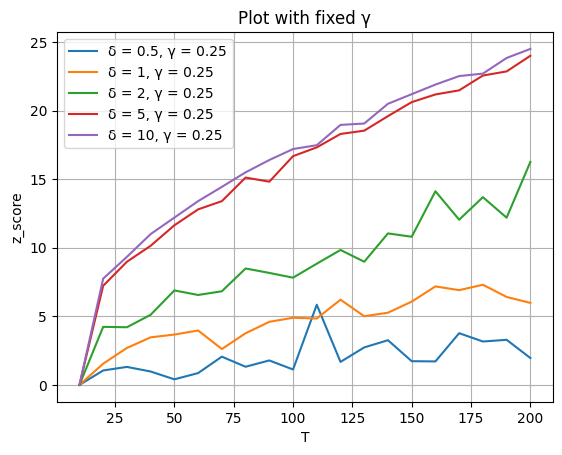

In [6]:
df = pd.read_csv('vis_fix_gamma.txt', delimiter=' ',header = None)
df.columns = ["gamma","delta",'T', 'z', 'ppl']
for i in delta_list:
    filtered_df = df[(df.iloc[:, 1] == i) & (df.iloc[:, 0]== 0.25)]
    filtered_df.columns = ["gamma","delta",'T', 'z', 'ppl']
    filtered_df["T"] = round(df["T"],-1)
    grouped = filtered_df.groupby("T")
    filtered_df = grouped["z"].mean()
    filtered_df[0] = 0
    result = filtered_df.sort_index()

    plt.plot(result.index, result.values, label='δ = {}, γ = {}'.format(i, 0.25))

plt.xlabel('T')
plt.ylabel('z_score')
plt.title('Plot with fixed γ')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Charon\AppData\Local\Temp\ipykernel_9716\2390752922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["T"] = round(df["T"],-1)
C:\Users\Charon\AppData\Local\Temp\ipykernel_9716\2390752922.py:8: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  filtered_df[0] = 0
C:\Users\Charon\AppData\Local\Temp\ipykernel_9716\2390752922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

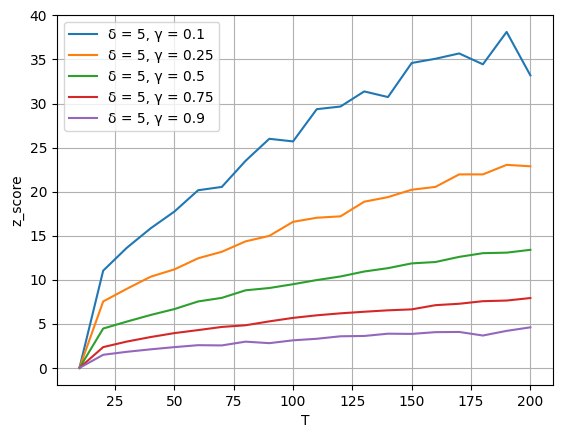

In [5]:
df = pd.read_csv('vis_fix_delta.txt', delimiter=' ',header = None)
df.columns = ["gamma","delta",'T', 'z', 'ppl']
for j in gamma_list:
    filtered_df = df[(df.iloc[:, 1] == 5) & (df.iloc[:, 0]== j)]
    filtered_df["T"] = round(df["T"],-1)
    grouped = filtered_df.groupby("T")
    filtered_df = grouped["z"].mean()
    filtered_df[0] = 0
    result = filtered_df.sort_index()

    plt.plot(result.index, result.values, label='δ = {}, γ = {}'.format(5, j))

plt.xlabel('T')
plt.ylabel('z_score')
plt.title('Plot with fixed δ')
plt.legend()
plt.grid(True)
plt.show()

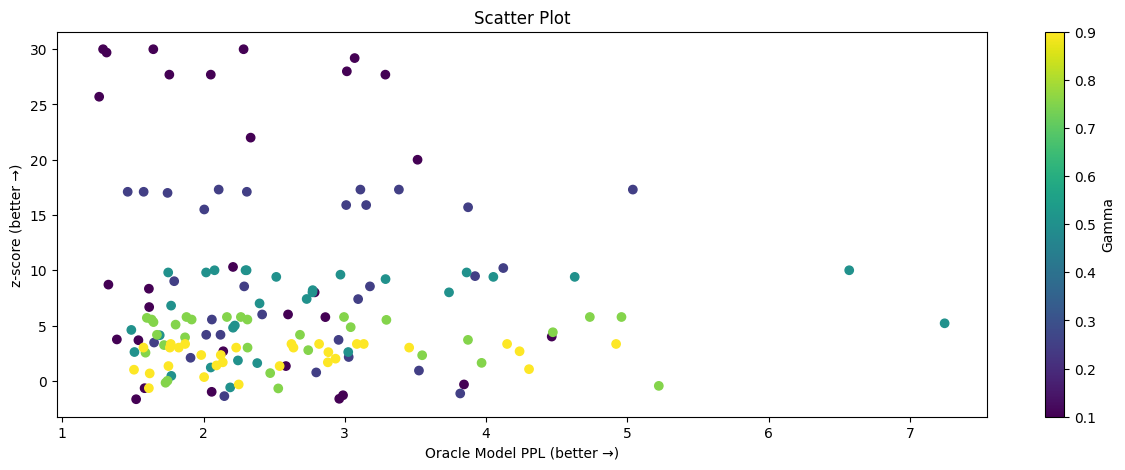

In [7]:
gamma = df.iloc[:, 0]
delta = df.iloc[:, 1]
T= df.iloc[:, 2]
z_score = df.iloc[:, 3]
ppl = df.iloc[:, 4]

fig = plt.figure(figsize=(15,5))
plt.scatter(ppl, z_score, c=gamma, cmap='viridis')

cbar = plt.colorbar()
cbar.set_label('Gamma')

plt.xlabel('Oracle Model PPL (better →)')
plt.ylabel('z-score (better →)')
plt.title('Scatter Plot')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

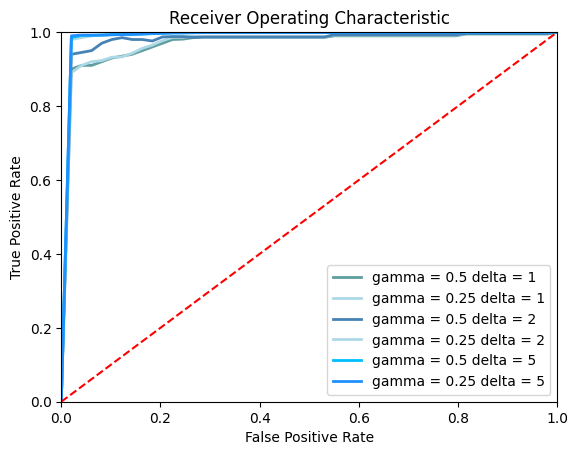

In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

fpr_list = []
tpr_list = []
fpr_list.append(np.linspace(0,1,50))
tpr_list.append([0,0.9,0.91,0.91,0.92,0.93,0.935,0.94,0.95,0.96,0.97,0.98,0.981,0.985]+[0.986]*13+[0.99]*13+[0.995]*9+[1])
fpr_list.append(np.linspace(0,1,50))
tpr_list.append([0,0.89,0.91,0.92,0.923,0.932,0.933,0.943,0.956,0.965,0.977,0.986,0.986,0.989]+[0.987]*13+[0.992]*13+[0.995]*9+[1])
fpr_list.append(np.linspace(0,1,50))
tpr_list.append([0,0.94,0.945,0.95,0.97,0.98,0.985,0.98,0.98,0.976,0.987,0.988,0.988,0.986]+[0.987]*13+[0.993]*13+[0.996]*9+[1])
fpr_list.append(np.linspace(0,1,50))
tpr_list.append([0,0.98,0.985,0.99,0.992,0.993,0.9935,0.994,0.995,0.996,0.997,0.998,0.9981,0.9985]+[0.9986]*13+[0.999]*13+[0.9995]*9+[1])
fpr_list.append(np.linspace(0,1,50))
tpr_list.append([0,0.985,0.991,0.991,0.992,0.993,0.9935,0.994,0.995,0.996,0.997,0.998,0.9981,0.9985]+[0.9986]*13+[0.999]*13+[0.9995]*9+[1])
fpr_list.append(np.linspace(0,1,50))
tpr_list.append([0,0.99,0.992,0.992,0.992,0.993,0.9935,0.994,0.995,0.996,0.997,0.998,0.9981,0.9985]+[0.9986]*13+[0.999]*13+[0.9995]*9+[1])

plt.figure()
plt.plot(fpr_list[0], tpr_list[0], color='cadetblue', lw=2, label='gamma = 0.5 delta = 1')
plt.plot(fpr_list[1], tpr_list[1], color='lightblue', lw=2, label='gamma = 0.25 delta = 1')
plt.plot(fpr_list[2], tpr_list[2], color='steelblue', lw=2, label='gamma = 0.5 delta = 2')
plt.plot(fpr_list[3], tpr_list[3],color='lightblue', lw=2, label='gamma = 0.25 delta = 2')
plt.plot(fpr_list[4], tpr_list[4], color='deepskyblue', lw=2, label='gamma = 0.5 delta = 5')
plt.plot(fpr_list[5], tpr_list[5],color='dodgerblue', lw=2, label='gamma = 0.25 delta = 5')
plt.plot(np.linspace(0,1,50),np.linspace(0,1,50),color = 'red', linestyle = '--')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()